In [13]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.io.cif import CifParser
from pymatgen.io.vasp import Poscar
from pymatgen.io.cif import CifWriter
from pymatgen.io.xyz import XYZ
from pymatgen.io.gaussian import GaussianInput
import numpy as np

In [5]:
graphite.apply_strain?

Signature: graphite.apply_strain(strain: 'ArrayLike') -> 'None'
Docstring:
Apply a strain to the lattice.

Args:
    strain (float or list): Amount of strain to apply. Can be a float,
        or a sequence of 3 numbers. E.g., 0.01 means all lattice
        vectors are increased by 1%. This is equivalent to calling
        modify_lattice with a lattice with lattice parameters that
        are 1% larger.
File:      ~/miniconda3/envs/dev/lib/python3.10/site-packages/pymatgen/core/structure.py
Type:      method


In [23]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`. See the warnings section below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

In [28]:
species_index_dict = {
    'C': 1
}

In [59]:
strains = np.arange(-0.5, 0, 0.01)

In [21]:
structures = {}
for strain in strains:
    graphite = Structure.from_file('graphite.3x3x1.cif')
    graphite.apply_strain([0, 0, strain])
    structures[strain] = graphite

In [18]:
for i in np.arange(-0.5, 0, 0.01):
    print(round(i,2))

-0.5
-0.49
-0.48
-0.47
-0.46
-0.45
-0.44
-0.43
-0.42
-0.41
-0.4
-0.39
-0.38
-0.37
-0.36
-0.35
-0.34
-0.33
-0.32
-0.31
-0.3
-0.29
-0.28
-0.27
-0.26
-0.25
-0.24
-0.23
-0.22
-0.21
-0.2
-0.19
-0.18
-0.17
-0.16
-0.15
-0.14
-0.13
-0.12
-0.11
-0.1
-0.09
-0.08
-0.07
-0.06
-0.05
-0.04
-0.03
-0.02
-0.01


In [26]:
for strain in strains:
    xyz = XYZ(structures[strain])
    name = f"graphite_scan/graphite_strained_{round(strain,2)}.xyz"
    xyz.write_file(name)
    os.system(f"cat {name} >> test_trj.xyz")
    os.system("echo '\n' >> test_trj.xyz")

In [5]:
import os
for i in os.listdir("."):
    if "graphite_strained_" in i:
        os.system(f"cat {i} >> test.xyz")
        

In [4]:
structures[0].sites[0]

PeriodicSite: C (0.0000, 0.0000, 1.6778) [0.0000, 0.0000, 0.2500]

In [5]:
structures[0].sites[0].species_string

'C'

In [6]:
structures[0].sites[0].coords

array([0.     , 0.     , 1.67775])

In [7]:
structures[0].lattice.as_dict()

{'@module': 'pymatgen.core.lattice',
 '@class': 'Lattice',
 'matrix': [[7.392, 0.0, 4.526294569648617e-16],
  [-3.695999999999998, 6.401659784774572, 4.526294569648617e-16],
  [0.0, 0.0, 6.711]]}

In [9]:
structures[-0.04].lattice.as_dict()

{'@module': 'pymatgen.core.lattice',
 '@class': 'Lattice',
 'matrix': [[7.392, 0.0, 4.526294569648617e-16],
  [-3.695999999999998, 6.401659784774572, 4.526294569648617e-16],
  [0.0, 0.0, 6.44256]]}

In [10]:
for i in structures:
    print(structures[i].volume)

304.86882712807585
308.0445440773266
311.2202610265774
314.3959779758282
317.571694925079
320.7474118743298
323.92312882358056
327.0988457728314
330.2745627220822


In [11]:
print('LatticeConstant 1.000000 Ang')
print('%block LatticeVectors')
for i in structures[0].lattice.as_dict()['matrix']:
    print(f"\t{i[0]:.10f}\t{i[1]:.10f}\t{i[2]:.10f}")
print('%endblock LatticeVectors')

LatticeConstant 1.000000 Ang
%block LatticeVectors
	7.3920000000	0.0000000000	0.0000000000
	-3.6960000000	6.4016597848	0.0000000000
	0.0000000000	0.0000000000	6.7110000000
%endblock LatticeVectors


In [4]:

print('AtomicCoordinatesFormat Ang')
print('%block AtomicCoordinatesAndAtomicSpecies')
for i in structures[0].sites:
    coord = i.coords
    print(f"\t{coord[0]:.9f}\t{coord[1]:.9f}\t{coord[2]:.9f}\t{species_index_dict[i.species_string]}")
print('%endblock AtomicCoordinatesAndAtomicSpecies')

AtomicCoordinatesFormat Fractional
%block AtomicCoordinatesAndAtomicSpecies
	0.000000000	0.000000000	1.677750000	1
	0.000000000	0.000000000	5.033250000	1
	-1.232000000	2.133886595	1.677750000	1
	-2.464000000	4.267773190	5.033250000	1
	2.464000000	4.267773190	1.677750000	1
	1.232000000	2.133886595	5.033250000	1
	2.464000000	0.000000000	1.677750000	1
	4.928000000	0.000000000	5.033250000	1
	2.464000000	0.000000000	5.033250000	1
	4.928000000	0.000000000	1.677750000	1
	2.464000000	4.267773190	5.033250000	1
	1.232000000	2.133886595	1.677750000	1
	-1.232000000	2.133886595	5.033250000	1
	-2.464000000	4.267773190	1.677750000	1
	0.000000000	4.267773190	1.677750000	1
	3.696000000	2.133886595	5.033250000	1
	3.696000000	2.133886595	1.677750000	1
	0.000000000	4.267773190	5.033250000	1
	0.000000000	1.422589641	1.677750000	1
	3.696000000	4.979070144	5.033250000	1
	2.464001232	5.690364964	1.677750000	1
	1.231998768	0.711294820	5.033250000	1
	-2.464001232	5.690364964	1.677750000	1
	6.160001232	0.7112948

In [15]:
len(structures[0])

36

In [5]:
import os

In [6]:
file = "test.fdf"
os.system(f"cat graphite.siesta_template_head.txt > {file}")

with open(file, "a") as f:
    f.write('\n\nLatticeConstant 1.000000 Ang\n')
    f.write('%block LatticeVectors\n')
    for i in structures[0].lattice.as_dict()['matrix']:
        f.write(f"\t{i[0]:.10f}\t{i[1]:.10f}\t{i[2]:.10f}\n")
    f.write('%endblock LatticeVectors\n\n')
    f.write('AtomicCoordinatesFormat Fractional\n')
    f.write('%block AtomicCoordinatesAndAtomicSpecies\n')
    for i in structures[0].sites:
        coord = i.coords
        f.write(f"\t{coord[0]:.8f}\t{coord[1]:.8f}\t{coord[2]:.8f}\t{species_index_dict[i.species_string]}\n")
    f.write('%endblock AtomicCoordinatesAndAtomicSpecies\n\n')

os.system(f"cat graphite.siesta_template_tail.txt >> {file}")

0

In [18]:
%pwd

'/mnt/d/home_base/PHD/ml-potential/pymatgen_test'

In [29]:
for strain in strains:
    file=f"./graphite_scan/graphite.{round(strain,2)}_zStrain.fdf"
    
    os.system(f"cat graphite.siesta_template_head.txt > {file}")

    with open(file, "a") as f:
        f.write('\n\nLatticeConstant 1.000000 Ang\n')
        f.write('%block LatticeVectors\n')
        for i in structures[strain].lattice.as_dict()['matrix']:
            f.write(f"\t{i[0]:.10f}\t{i[1]:.10f}\t{i[2]:.10f}\n")
        f.write('%endblock LatticeVectors\n\n')
        f.write('AtomicCoordinatesFormat Ang\n')
        f.write('%block AtomicCoordinatesAndAtomicSpecies\n')
        for i in structures[strain].sites:
            coord = i.coords
            f.write(f"\t{coord[0]:.8f}\t{coord[1]:.8f}\t{coord[2]:.8f}\t{species_index_dict[i.species_string]}\n")
        f.write('%endblock AtomicCoordinatesAndAtomicSpecies\n\n')

    os.system(f"cat graphite.siesta_template_tail.txt >> {file}")

In [30]:
# no grimm correction
for strain in strains:
    file=f"./graphite_nogrimm/graphite.{round(strain,2)}_zStrain.fdf"
    
    os.system(f"cat graphite.siesta_template_head.txt > {file}")

    with open(file, "a") as f:
        f.write('\n\nLatticeConstant 1.000000 Ang\n')
        f.write('%block LatticeVectors\n')
        for i in structures[strain].lattice.as_dict()['matrix']:
            f.write(f"\t{i[0]:.10f}\t{i[1]:.10f}\t{i[2]:.10f}\n")
        f.write('%endblock LatticeVectors\n\n')
        f.write('AtomicCoordinatesFormat Ang\n')
        f.write('%block AtomicCoordinatesAndAtomicSpecies\n')
        for i in structures[strain].sites:
            coord = i.coords
            f.write(f"\t{coord[0]:.8f}\t{coord[1]:.8f}\t{coord[2]:.8f}\t{species_index_dict[i.species_string]}\n")
        f.write('%endblock AtomicCoordinatesAndAtomicSpecies\n\n')

    os.system(f"cat graphite.siesta_template_tail.nogrimm.txt >> {file}")

In [9]:
len(strains)

9

In [32]:
structures[-0.5]

Structure Summary
Lattice
    abc : 7.392 7.392 3.3555
 angles : 90.0 90.0 119.99999999999999
 volume : 158.7858474625395
      A : 7.392 0.0 4.526294569648617e-16
      B : -3.695999999999998 6.401659784774572 4.526294569648617e-16
      C : 0.0 0.0 3.3555
PeriodicSite: C (0.0000, 0.0000, 0.8389) [0.0000, 0.0000, 0.2500]
PeriodicSite: C (0.0000, 0.0000, 2.5166) [0.0000, 0.0000, 0.7500]
PeriodicSite: C (-1.2320, 2.1339, 0.8389) [0.0000, 0.3333, 0.2500]
PeriodicSite: C (-2.4640, 4.2678, 2.5166) [0.0000, 0.6667, 0.7500]
PeriodicSite: C (2.4640, 4.2678, 0.8389) [0.6667, 0.6667, 0.2500]
PeriodicSite: C (1.2320, 2.1339, 2.5166) [0.3333, 0.3333, 0.7500]
PeriodicSite: C (2.4640, 0.0000, 0.8389) [0.3333, 0.0000, 0.2500]
PeriodicSite: C (4.9280, 0.0000, 2.5166) [0.6667, 0.0000, 0.7500]
PeriodicSite: C (2.4640, 0.0000, 2.5166) [0.3333, 0.0000, 0.7500]
PeriodicSite: C (4.9280, 0.0000, 0.8389) [0.6667, 0.0000, 0.2500]
PeriodicSite: C (2.4640, 4.2678, 2.5166) [0.6667, 0.6667, 0.7500]
PeriodicSite: 

In [ ]:
structures[-0.5].to

In [34]:
Poscar?

Init signature:
Poscar(
    structure: 'Structure',
    comment: 'str' = None,
    selective_dynamics=None,
    true_names: 'bool' = True,
    velocities: 'ArrayLike' = None,
    predictor_corrector: 'ArrayLike' = None,
    predictor_corrector_preamble: 'str' = None,
    sort_structure: 'bool' = False,
)
Docstring:     
Object for representing the data in a POSCAR or CONTCAR file.
Please note that this current implementation. Most attributes can be set
directly.

.. attribute:: structure

    Associated Structure.

.. attribute:: comment

    Optional comment string.

.. attribute:: true_names

    Boolean indication whether Poscar contains actual real names parsed
    from either a POTCAR or the POSCAR itself.

.. attribute:: selective_dynamics

    Selective dynamics attribute for each site if available. A Nx3 array of
    booleans.

.. attribute:: velocities

    Velocities for each site (typically read in from a CONTCAR). A Nx3
    array of floats.

.. attribute:: predictor_correct

In [35]:
print(strains)

[-0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41 -0.4  -0.39
 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29 -0.28 -0.27
 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15
 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03
 -0.02 -0.01]


In [71]:
energies = []
for strain in strains:
    with open(f"./graphite_scan_outputs/grimm/OUT.graphite.{round(strain,2)}_zStrain") as f:
        for line in f:
            if "siesta:         Total =" in line:
                energies.append(float(line.strip().split()[3]))
        

In [72]:
from matplotlib import pyplot as plt

-5527.003319
[5.100360000000002]


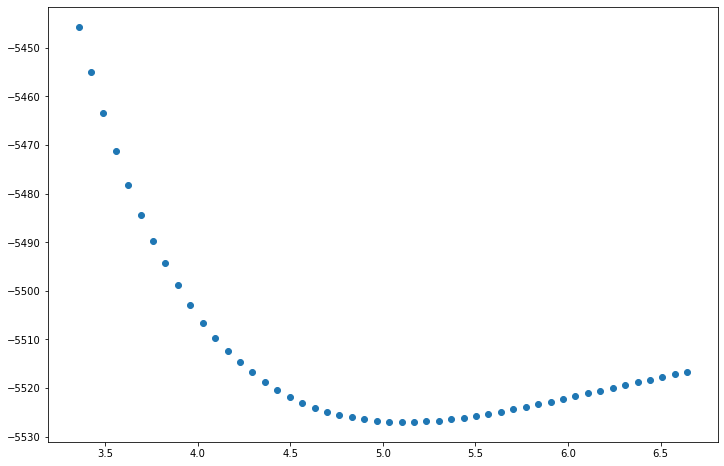

In [73]:
z_distance = [6.711 * (1+s) for s in strains]

print(np.min(energies))
mindist = [z_distance[i] for i,j in enumerate(energies) if j == np.min(energies)]
print(mindist)

plt.figure(figsize=(12,8))
plt.scatter(z_distance,energies)
plt.show()

-5520.167389
[5.167470000000002]


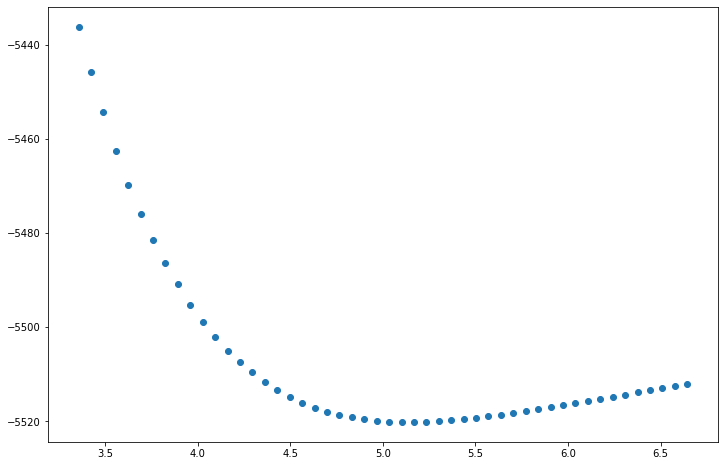

In [74]:
nogrimm_energies = []
for strain in strains:
    with open(f"./graphite_scan_outputs/nogrimm/OUT.graphite.{round(strain,2)}_zStrain") as f:
        for line in f:
            if "siesta:         Total =" in line:
                nogrimm_energies.append(float(line.strip().split()[3]))

print(np.min(nogrimm_energies))
mindist = [z_distance[i] for i,j in enumerate(nogrimm_energies) if j == np.min(nogrimm_energies)]
print(mindist)     

plt.figure(figsize=(12,8))
plt.scatter(z_distance,nogrimm_energies)
plt.show()

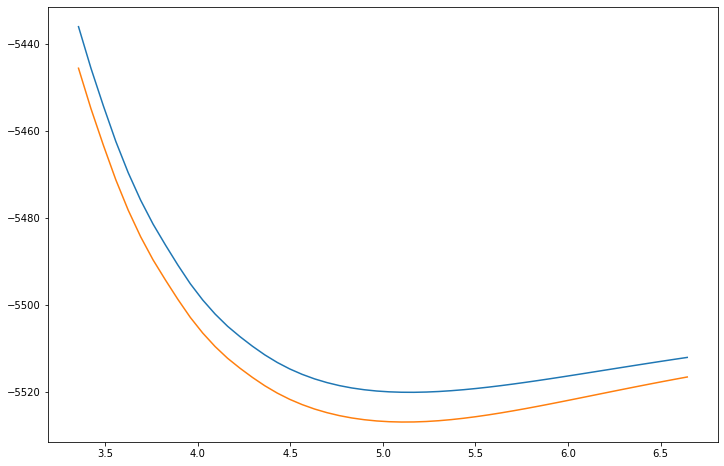

In [75]:
plt.figure(figsize=(12,8))
plt.plot(z_distance,nogrimm_energies)
plt.plot(z_distance,energies)
plt.show()